In [1]:
import pickle
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
from pathlib import Path
from spice.spectrum import AB_passband_luminosity
from spice.spectrum.filter import JohnsonCousinsU, JohnsonCousinsB, JohnsonCousinsV, JohnsonCousinsR, JohnsonCousinsI
import matplotlib
%matplotlib inline

# Load the pickle files
with open("/Users/mjablons/Documents/stellar-mesh-integration/tutorial/paper_results/tz_fornacis_data_eclipses_40000.pkl", "rb") as f:
    data = pickle.load(f)

float_dtype: <class 'jax.numpy.float32'>


In [3]:
johnson_cousins_u = JohnsonCousinsU()
johnson_cousins_b = JohnsonCousinsB()
johnson_cousins_v = JohnsonCousinsV()
johnson_cousins_r = JohnsonCousinsR()
johnson_cousins_i = JohnsonCousinsI()

In [4]:
times = data['times']
pb1 = data['mesh_body1']
pb2 = data['mesh_body2']
spectra1 = data['spectra_body1']
spectra2 = data['spectra_body2']
wavelengths = data['wavelengths']

In [5]:
offset = 20
mag_u = [AB_passband_luminosity(johnson_cousins_u, data['wavelengths'], s1[:, 0]+s2[:, 0])
         for s1, s2 in zip(spectra1, spectra2)][offset:]
mag_b = [AB_passband_luminosity(johnson_cousins_b, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][offset:]
mag_v = [AB_passband_luminosity(johnson_cousins_v, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][offset:]
mag_r = [AB_passband_luminosity(johnson_cousins_r, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][offset:]
mag_i = [AB_passband_luminosity(johnson_cousins_i, data['wavelengths'], s1[:, 0]+s2[:, 0])
          for s1, s2 in zip(spectra1, spectra2)][offset:]
times = data['times'][offset:]

In [9]:
import astropy.units as u
period = (75.6*u.d).to(u.year).value
phases = times/period

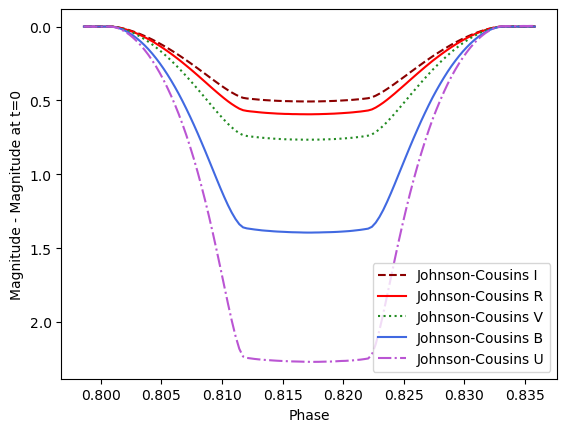

In [15]:
plt.plot(phases, np.array(mag_i)-mag_i[0], label='Johnson-Cousins I', color='darkred', linestyle='--')
plt.plot(phases, np.array(mag_r)-mag_r[0], label='Johnson-Cousins R', color='red')
plt.plot(phases, np.array(mag_v)-mag_v[0], label='Johnson-Cousins V', color='forestgreen', linestyle=':')
plt.plot(phases, np.array(mag_b)-mag_b[0], label='Johnson-Cousins B', color='royalblue')
plt.plot(phases, np.array(mag_u)-mag_u[0], label='Johnson-Cousins U', color='mediumorchid', linestyle='-.')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('Magnitude - Magnitude at t=0')
plt.xlabel('Phase')
plt.savefig('img/tz_fornacis_eclipse_plots.png', dpi=300)
plt.show()

In [ ]:
np.argmin(np.abs(times-0.168)), np.argmin(np.abs(times-0.170025))

(52, 83)

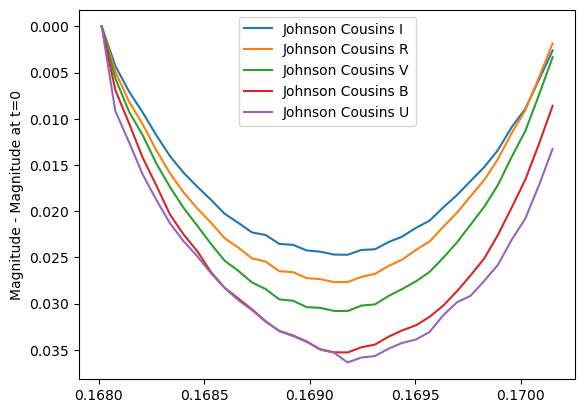

In [ ]:
start_idx = 52
end_idx=86
mag_i_cropped = np.array(mag_i)[start_idx:end_idx]
mag_r_cropped = np.array(mag_r)[start_idx:end_idx]
mag_v_cropped = np.array(mag_v)[start_idx:end_idx]
mag_b_cropped = np.array(mag_b)[start_idx:end_idx]
mag_u_cropped = np.array(mag_u)[start_idx:end_idx]
times_cropped = np.array(times)[start_idx:end_idx]

plt.plot(times_cropped, np.array(mag_i_cropped)-mag_i_cropped[0], label='Johnson Cousins I')
plt.plot(times_cropped, np.array(mag_r_cropped)-mag_r_cropped[0], label='Johnson Cousins R')
plt.plot(times_cropped, np.array(mag_v_cropped)-mag_v_cropped[0], label='Johnson Cousins V')
plt.plot(times_cropped, np.array(mag_b_cropped)-mag_b_cropped[0], label='Johnson Cousins B')
plt.plot(times_cropped, np.array(mag_u_cropped)-mag_u_cropped[0], label='Johnson Cousins U')
plt.gca().invert_yaxis()
plt.legend()
plt.ylabel('Magnitude - Magnitude at t=0')
plt.show()

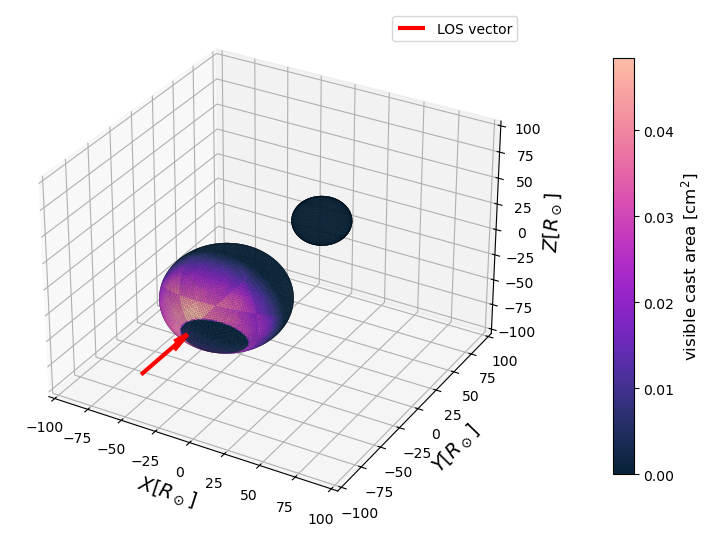

In [ ]:
from spice.plots import plot_3D_binary
plot_3D_binary(pb1[70], pb2[70], scale_radius=5, draw_rotation_axes=False, property='visible_cast_areas');